<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/eat_tensorflow2_in_30_days/Chapter3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-3 High-level API: Demonstration

The examples below use high-level APIs in TensorFlow to implement a linear regression model and a DNN binary classification model.

Typically, the high-level APIs are providing the class interfaces for `tf.keras.models`.

There are three way of modeling using APIs of keras:
1. sequential modeling using `Sequential` function.
2. arbitary modeling using API functions.
3. customized modeling by inheriting base class `Model`.

Here the demonstrating using `Sequential` function and customized modeling by inheriting base class `Model`, respectively

In [1]:
import tensorflow as tf

# Time stamp
@tf.function
def printbar():
  today_ts = tf.timestamp()%(24*60*60)

  hour = tf.cast(today_ts//3600+8, tf.int32)%tf.constant(24)
  minute = tf.cast((today_ts%3600)//60, tf.int32)
  second = tf.cast(tf.floor(today_ts%60), tf.int32)

  def timeformat(m):
    if tf.strings.length(tf.strings.format("{}", m)) == 1:
      return(tf.strings.format("0{}", m))
    else:
      return(tf.strings.format("{}", m))

  timestring = tf.strings.join([timeformat(hour), timeformat(minute),
      timeformat(second)], separator = ":")

  tf.print("=========="* 8 + timestring)

## 1. Linear Regression Model

The `Sequential` function to construct the model sequentially and use the pre-defined method `model.fit` for training (for the beginners)

### (a) Data Preparation

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, metrics, losses

In [3]:
# Number of sample
n = 400

In [7]:
# Generate the datasets
X = tf.random.uniform([n, 2], minval=-10, maxval=10)
w0 = tf.constant([[2.0], [-3.0]])
b0 = tf.constant(3.0)
Y = X@w0 + b0 + tf.random.normal([n, 1], mean=0.0, stddev=2.0)

Text(0, 0.5, 'y')

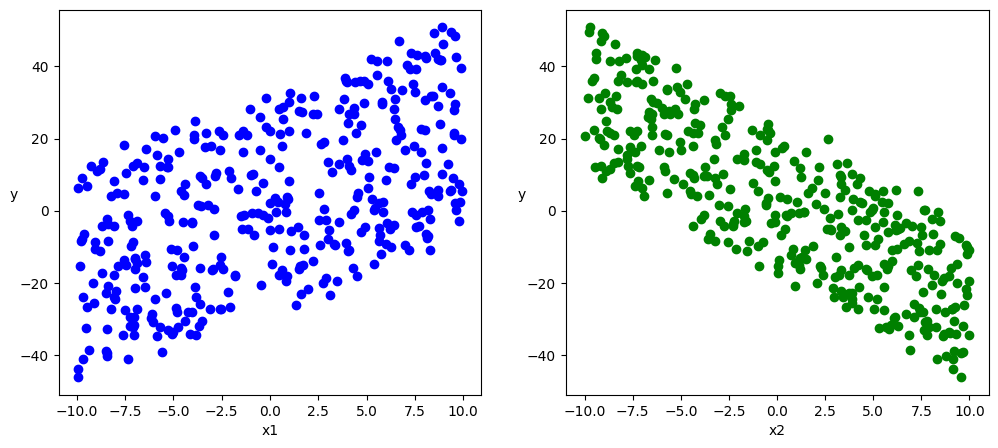

In [8]:
# Data visualization
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c='b', marker='o')
ax1.set_xlabel('x1')
ax1.set_ylabel('y', rotation=0)

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c='g', marker='o')
ax2.set_xlabel('x2')
ax2.set_ylabel('y', rotation=0)

### (b) Model Definition

In [10]:
tf.keras.backend.clear_session()

# Linear regression model
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(2,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (c) Model Training

In [11]:
# Training using method fit
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X, Y, epochs=200, batch_size=10)

tf.print('w = ', model.layers[0].kernel)
tf.print('b = ', model.layers[0].bias)

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 453.9643 - mae: 17.6556
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 441.6310 - mae: 17.4185
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 429.4348 - mae: 17.1799
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 417.5756 - mae: 16.9436
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 405.9732 - mae: 16.7102
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 394.6275 - mae: 16.4765
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 383.4893 - mae: 16.2460
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 372.6571 - mae: 16.0143
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 361.9566 - mae: 15.7891
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 351.6906 - mae: 15.5663
Epoch 11/200
40/40 [=========

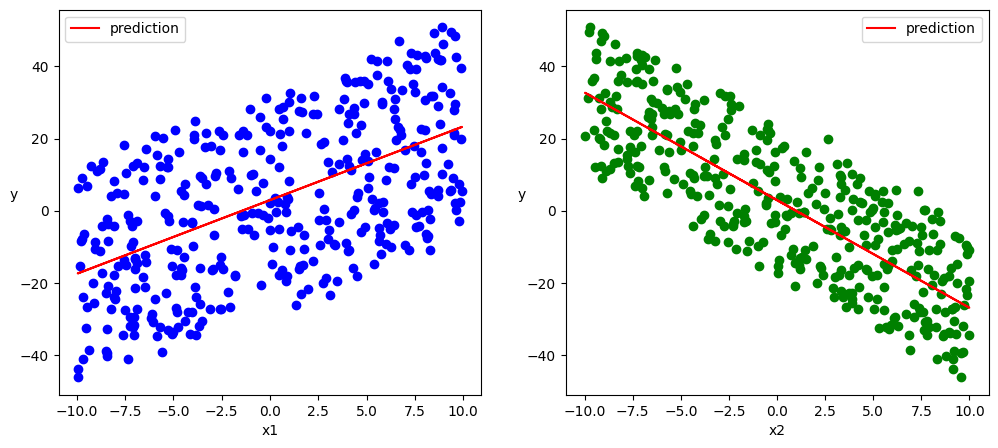

In [15]:
# Visualize the results
w, b = model.variables

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121)
ax1.scatter(X[:, 0], Y[:, 0], c='b', marker='o')
ax1.plot(X[:, 0], w[0] * X[:, 0] + b[0], color='r', label='prediction')
ax1.legend()
ax1.set_xlabel('x1')
ax1.set_ylabel('y', rotation=0)

ax2 = plt.subplot(122)
ax2.scatter(X[:, 1], Y[:, 0], c='g', marker='o')
ax2.plot(X[:, 1], w[1] * X[:, 1] + b[0], color='r', label='prediction')
ax2.legend()
ax2.set_xlabel('x2')
ax2.set_ylabel('y', rotation=0)

plt.show()